# STEP #1: IMPORTING LIBRARIES

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random
import matplotlib.image as mpimg
import csv
import os
from sklearn.model_selection import train_test_split

# STEP #2: data loading

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
# Path to the folder containing JPEG images
sunflower_path = "input/sunflower"

# Get a list of all files in the folder
files = os.listdir(sunflower_path)

# Filter only JPEG files
jpg_files = [file for file in files if file.lower().endswith(".jpg")]

csv_file_path = "output/flowers.csv"

# Write pixel values to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    csv_writer.writerow(['Pixel{}'.format(i+1) for i in range(65536)])
    # Loop through each JPEG file
    for jpg_file in jpg_files:
        # Construct the full file path
        file_path = os.path.join(sunflower_path, jpg_file)

        # Open the image
        img = mpimg.imread(file_path)     

        # Turn image to greyscale
        gray = rgb2gray(img)   

        # Get the pixel values as a flat list
        pixel_values = [int(value) for value in gray.flatten().tolist()]
        
        # Save pixels in csv
        csv_writer.writerow(['{}'.format(pixel_values[i]) for i in range(len(pixel_values))])
        
        
'''
# Open the CSV file again to print the first and last rows
with open(csv_file_path, 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)

    # Print the header (first row)
    print(next(csv_reader))

    # Get the last row
    last_row = None
    for row in csv_reader:
        last_row = row

    # Print the last row
    print(last_row)   

'''




"\n# Open the CSV file again to print the first and last rows\nwith open(csv_file_path, 'r', newline='') as csvfile:\n    csv_reader = csv.reader(csvfile)\n\n    # Print the header (first row)\n    print(next(csv_reader))\n\n    # Get the last row\n    last_row = None\n    for row in csv_reader:\n        last_row = row\n\n    # Print the last row\n    print(last_row)   \n\n"

In [4]:
# Path to the folder containing JPEG images
rose_path = "input/rose"

# Get a list of all files in the folder
files = os.listdir(rose_path)

# Filter only JPEG files
jpg_files = [file for file in files if file.lower().endswith(".jpg")]

csv_file_path = "output/roses.csv"

# Write pixel values to CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    csv_writer.writerow(['Pixel{}'.format(i+1) for i in range(65536)])
    # Loop through each JPEG file
    for jpg_file in jpg_files:
        # Construct the full file path
        file_path = os.path.join(rose_path, jpg_file)

        # Open the image
        img = mpimg.imread(file_path)     

        # Turn image to greyscale
        gray = rgb2gray(img)   

        # Get the pixel values as a flat list
        pixel_values = [int(value) for value in gray.flatten().tolist()]
        
        # Save pixels in csv
        csv_writer.writerow(['{}'.format(pixel_values[i]) for i in range(len(pixel_values))])
        
        
'''
# Open the CSV file again to print the first and last rows
with open(csv_file_path, 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)

    # Print the header (first row)
    print(next(csv_reader))

    # Get the last row
    last_row = None
    for row in csv_reader:
        last_row = row

    # Print the last row
    print(last_row)   

'''



"\n# Open the CSV file again to print the first and last rows\nwith open(csv_file_path, 'r', newline='') as csvfile:\n    csv_reader = csv.reader(csvfile)\n\n    # Print the header (first row)\n    print(next(csv_reader))\n\n    # Get the last row\n    last_row = None\n    for row in csv_reader:\n        last_row = row\n\n    # Print the last row\n    print(last_row)   \n\n"

# STEP #3: SPLITTING DATA FOR TRAINING AND TESTING

In [5]:
# Load csvs as training data
flower_train_df = pd.read_csv('output/flowers.csv',sep=',')
flower_training = np.array(flower_train_df, dtype = 'int')

rose_train_df = pd.read_csv('output/roses.csv',sep=',')
rose_training = np.array(rose_train_df, dtype = 'int')

# append label 0 to flower data
zeros_column = np.zeros((flower_training.shape[0], 1))
flower_training = np.hstack((zeros_column, flower_training))

# append label 1 to rose data
ones_column = np.ones((rose_training.shape[0], 1))
rose_training = np.hstack((ones_column, rose_training))

# Prepare the training and testing dataset 
flower_X_train = flower_training[:79,1:]/255
flower_y_train = flower_training[:79,0]
rose_X_train = rose_training[:79,1:]/255
rose_y_train = rose_training[:79,0]

flower_X_test = flower_training[80:,1:]/255
flower_y_test = flower_training[80:,0]
rose_X_test = rose_training[80:,1:]/255
rose_y_test = rose_training[80:,0]

# join datasets
X_train = np.vstack((rose_X_train, flower_X_train))
y_train = np.concatenate((rose_y_train, flower_y_train))
X_test = np.vstack((rose_X_test, flower_X_test))
y_test = np.concatenate((rose_y_test, flower_y_test))

# validation dataset that might used to help the model to generalize
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

# * unpack the tuple. Reshape the data in a form that CNN can accept 
X_train = X_train.reshape(X_train.shape[0], *(256, 256, 1))
X_test = X_test.reshape(X_test.shape[0], *(256, 256, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(256, 256, 1))


In [8]:
X_train.shape

(126, 256, 256, 1)

In [9]:
X_test.shape

(16, 256, 256, 1)

In [10]:
X_validate.shape

(32, 256, 256, 1)

In [11]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [12]:
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize your model
model = models.Sequential()

# Convolutional layer with more filters, kernel size (3x3), and 'same' padding
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Another convolutional layer with increased filters
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening
model.add(layers.Flatten())

# Dense layer with more units
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization

# Output layer with softmax activation
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to see the architecture
model.summary()

# 6. Define the training parameters 
    # number of epochs 
    # batch size 
epochs = 10  # Number of training epochs
batch_size = 32  # Number of samples per gradient update
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 256)               1

# STEP #5: EVALUATING THE MODEL

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. evaluate your model using test_set 
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_validate, y_validate))
# 2. compare the validation accuracy of the last epoch and test accuracy and explain in your words why they are differnt. 
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Q. Discuss how to enhance the performance of the model and explain in your words why that help and how much ?!
# hint: update the architecture by adding dropout regularization 
# My values are actually the same as i added dropout in the first place, but in short dropout helps by avoiding 
# overreliance in individual nodes


Epoch 1/10
4/4 [==============================] - 6s 2s/step - loss: 5.5432 - accuracy: 0.5714 - val_loss: 2.4295 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 6s 1s/step - loss: 1.4869 - accuracy: 0.5635 - val_loss: 0.6702 - val_accuracy: 0.6562
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 0.6067 - accuracy: 0.8095 - val_loss: 0.5908 - val_accuracy: 0.6250
Epoch 4/10
4/4 [==============================] - 6s 1s/step - loss: 0.5515 - accuracy: 0.7698 - val_loss: 0.4891 - val_accuracy: 0.7188
Epoch 5/10
4/4 [==============================] - 6s 2s/step - loss: 0.3075 - accuracy: 0.8810 - val_loss: 0.6052 - val_accuracy: 0.6562
Epoch 6/10
4/4 [==============================] - 6s 2s/step - loss: 0.2449 - accuracy: 0.8889 - val_loss: 0.4800 - val_accuracy: 0.7812
Epoch 7/10
4/4 [==============================] - 6s 2s/step - loss: 0.1956 - accuracy: 0.9365 - val_loss: 0.5382 - val_accuracy: 0.7812
Epoch 8/10
4/4 [=========================

1/1 [==============================] - 0s 268ms/step


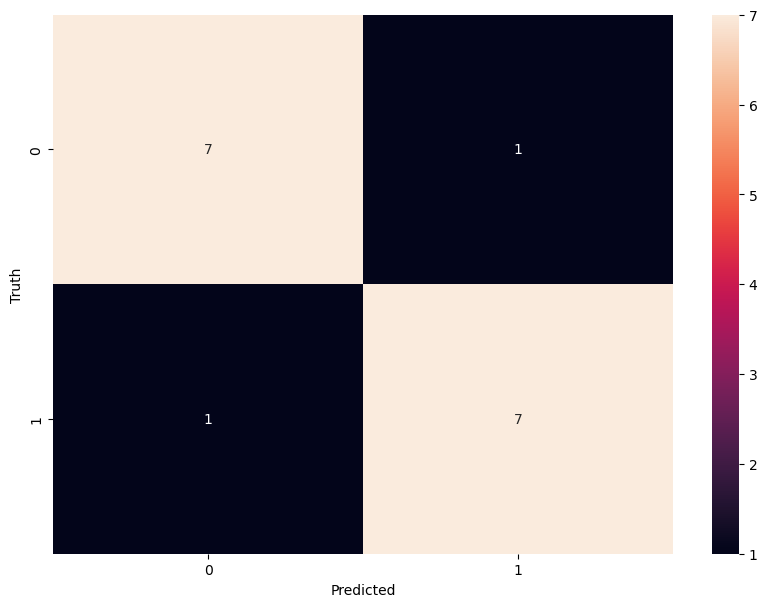

In [14]:
# 3. Using the confusion matrix for evaluation:
# Get the model predictions
probabilities = model.predict(X_test)
y_pred = np.argmax(probabilities, axis=1)  # converting probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

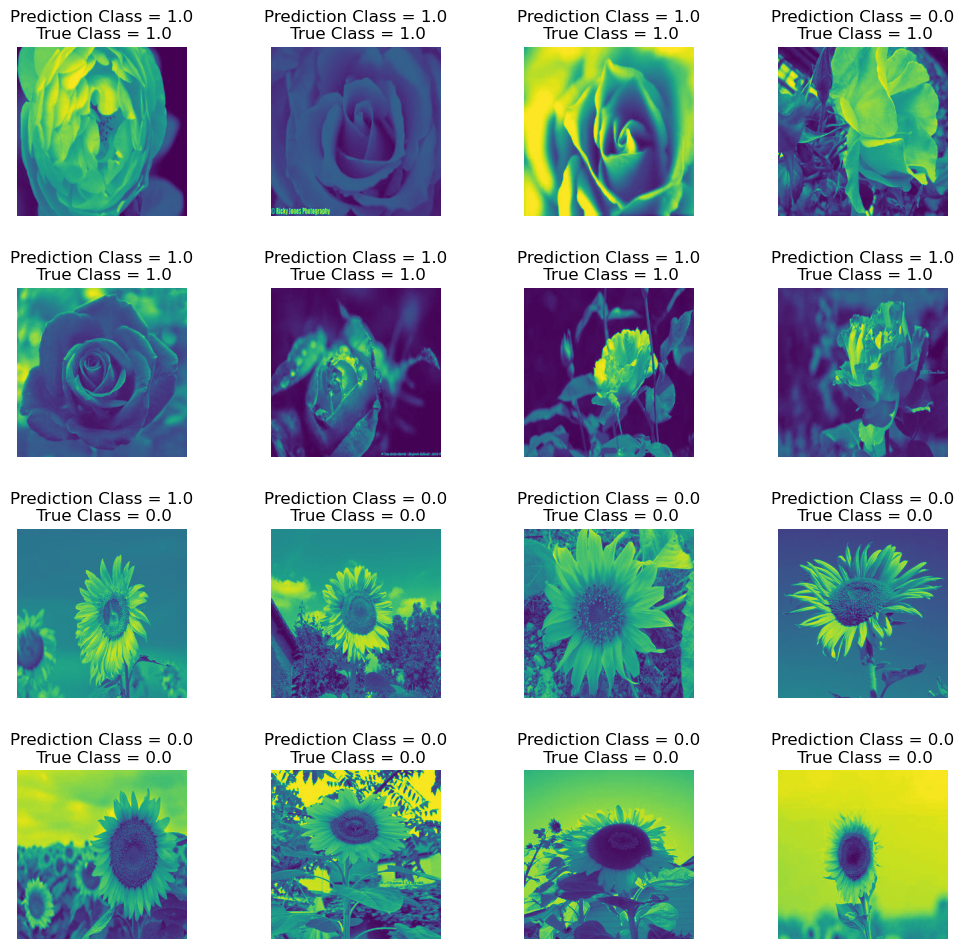

In [18]:
L = 5
W = 5
fig, axes = plt.subplots(4, 4, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, 16):  
    axes[i].imshow(X_test[i].reshape(256,256))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
